In [46]:
import pandas as pd

In [47]:
data = pd.read_csv('loan.csv')

/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/144827106.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


In [48]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [50]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [51]:
data.dropna(axis=1, how='all', inplace=True)


In [ ]:
# Filling missing numeric columns with median
data['chargeoff_within_12_mths'].fillna(data['chargeoff_within_12_mths'].median(), inplace=True)
data['tax_liens'].fillna(data['tax_liens'].median(), inplace=True)

In [ ]:
#filling missing categorical values with NA  
data['mths_since_last_delinq'].fillna('NA', inplace=True)
data['mths_since_last_record'].fillna('NA', inplace=True)
data['title'].fillna('NA', inplace=True)
data['last_pymnt_d'].fillna('NA', inplace=True)
data['next_pymnt_d'].fillna('NA', inplace=True)

In [54]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [55]:
# converting to datetime values
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
# data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['last_pymnt_d'] = data['last_pymnt_d'].apply(lambda x: pd.to_datetime(x, format='%b-%y') if x != 'NA' else x)


# EDA

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Filtering the dataset for Charged-off loans
df = data[data['loan_status'] == 'Charged Off']


In [58]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NA,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NA,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NA,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,NA,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,NA,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [59]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

## Univariate Analysis


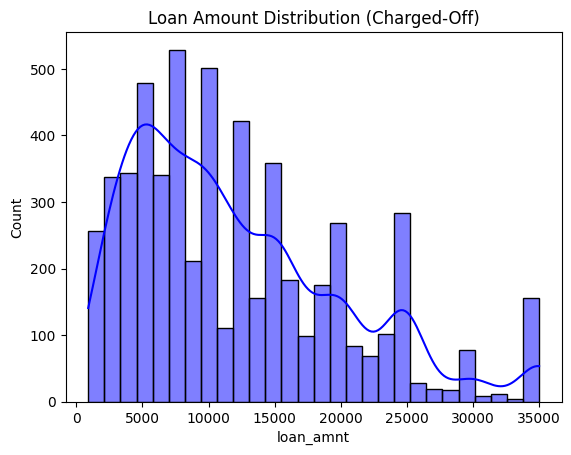

In [60]:
# Loan Amount between range 5000 - 15000 seem to default more than the rest, although this is a very broad discriminator
sns.histplot(df['loan_amnt'], kde=True, color='blue')
plt.title('Loan Amount Distribution (Charged-Off)')
plt.show()

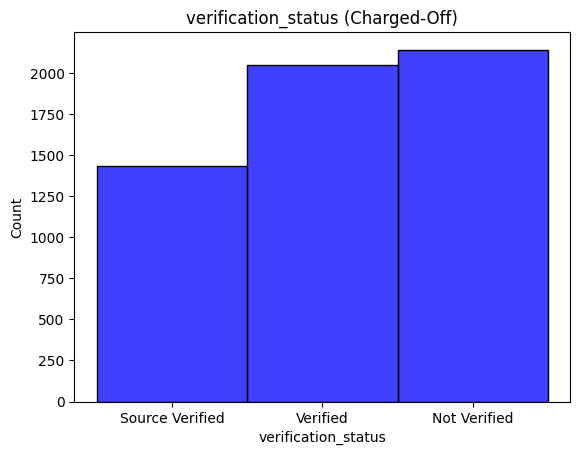

In [61]:
# Verification Status: Source verified individuals default the least 
sns.histplot(df['verification_status'], color='blue')
plt.title('verification_status (Charged-Off)')
plt.show()


/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/3307158984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='term', data=df, palette='Set2')


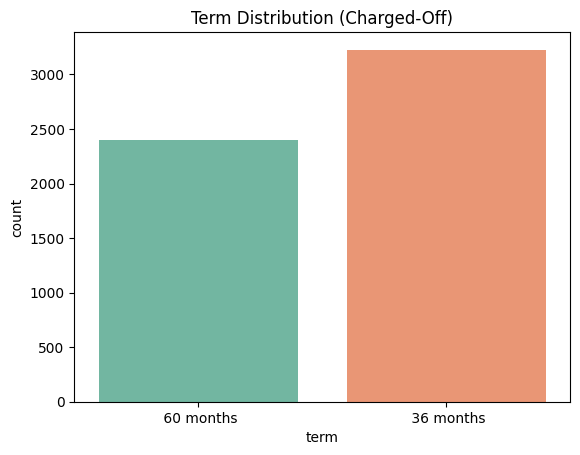

In [62]:
# Term : Clearly people with a 36 months term period default more, this can be used as a good discriminator
sns.countplot(x='term', data=df, palette='Set2')
plt.title('Term Distribution (Charged-Off)')
plt.show()

/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/775315372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=df, palette='Set1')


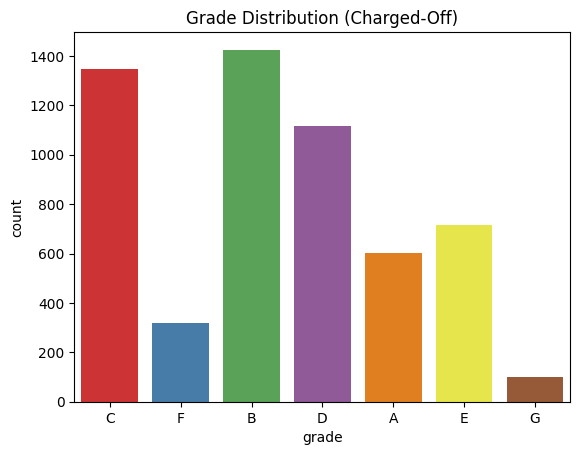

In [63]:
# Grade: B & C grade individuals default the most here
sns.countplot(x='grade', data=df, palette='Set1')
plt.title('Grade Distribution (Charged-Off)')
plt.show()

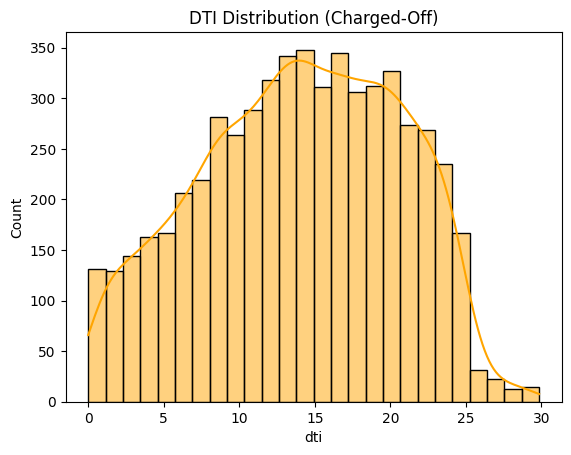

In [64]:
# The concentration of DTI values in the 10–20 range likely indicates that the majority of borrowers in the dataset have a high level of debt relative to their income
sns.histplot(df['dti'], kde=True, color='orange')
plt.title('DTI Distribution (Charged-Off)')
plt.show()

/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/1088422588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emp_length', data=df, palette='Set3')


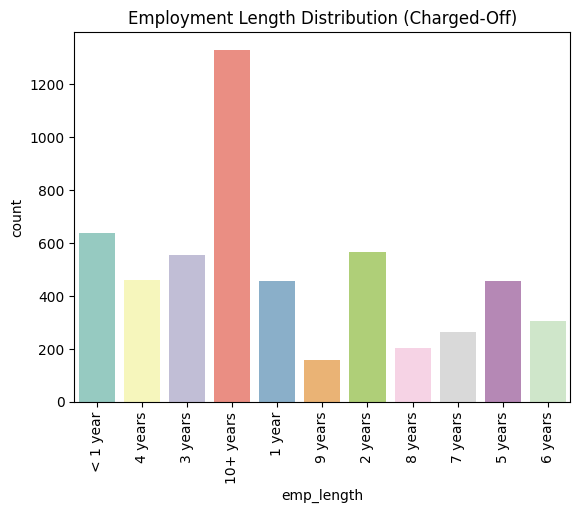

In [65]:
# Clearly borrowers with 10 or more years of employment have defaulted the most. Long-term employed individuals might have been approved for larger loans or higher credit limits because they appear to have greater financial stability.
# However, larger loans come with higher installment payments, and despite their steady employment, they may have been unable to manage these larger payments, leading to defaults.
sns.countplot(x='emp_length', data=df, palette='Set3')
plt.title('Employment Length Distribution (Charged-Off)')
plt.xticks(rotation=90)
plt.show()

/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/1045752109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='home_ownership', data=df, palette='Set1')


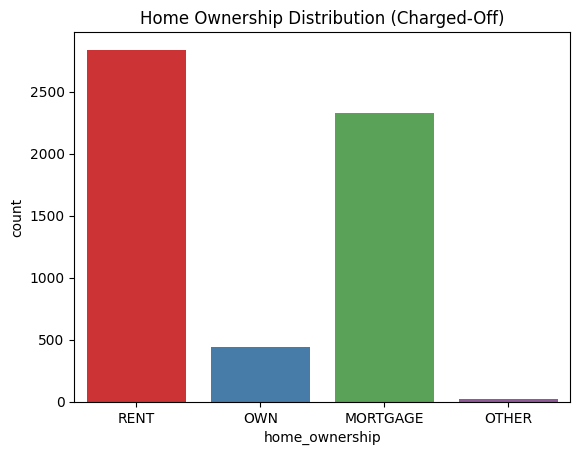

In [66]:
# Renters might generally have less financial stability, less consistent employment or income stability or less disposable income than those who own homes or have a mortgage.
sns.countplot(x='home_ownership', data=df, palette='Set1')
plt.title('Home Ownership Distribution (Charged-Off)')
plt.show()


## Bi-Variate Analysis


In [67]:
# Remove '%' and convert int_rate to float
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)


/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/1108764579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)


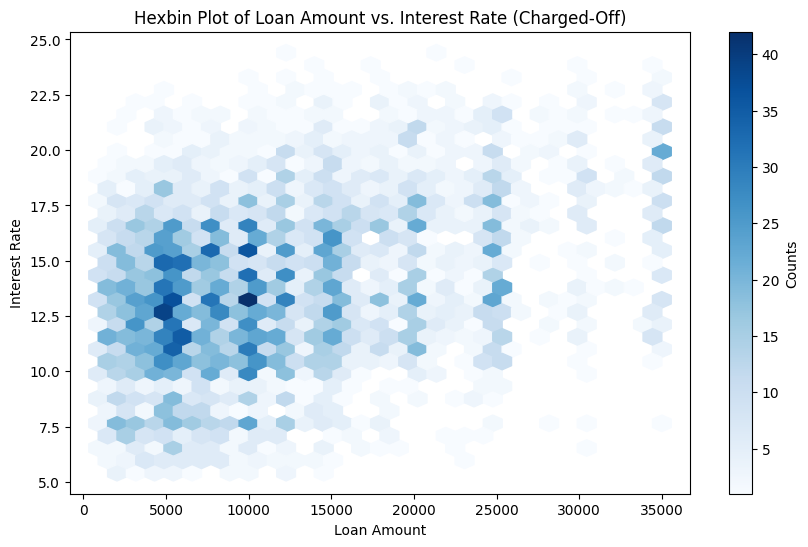

In [68]:
# This simply shows that amount 5,000 at 13% interest is a popular loan combination
plt.figure(figsize=(10, 6))
plt.hexbin(df['loan_amnt'], df['int_rate'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Loan Amount vs. Interest Rate (Charged-Off)')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()


/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/330576068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='loan_amnt', data=df, palette='Set3')


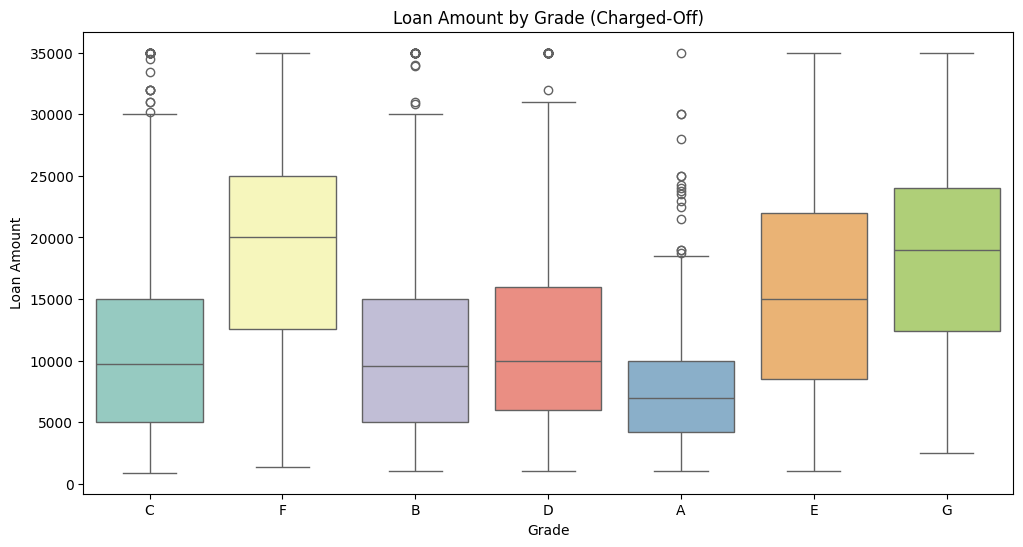

In [69]:
# Higher grades (e.g., A, B) have smaller loan amounts compared to lower grades (e.g., F, G)
# This suggests that more creditworthy borrowers tend to take out smaller loans, whereas riskier borrowers take larger loans.
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='loan_amnt', data=df, palette='Set3')
plt.title('Loan Amount by Grade (Charged-Off)')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()


/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/763981700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dti_bins'] = pd.cut(df['dti'], bins)
/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/763981700.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dti_bins', y='loan_amnt', data=df, palette='Set3')


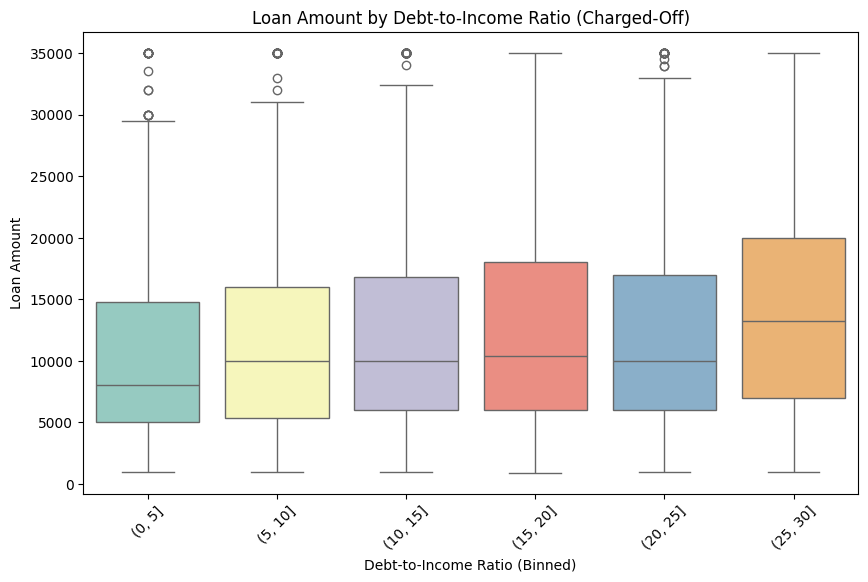

In [70]:
# Loan amount increases only slightly as DTI increases, it could suggest that loan amount decisions are not heavily influenced by the borrower's DTI.

bins = [0, 5, 10, 15, 20, 25, 30]
df['dti_bins'] = pd.cut(df['dti'], bins)

plt.figure(figsize=(10, 6))
sns.boxplot(x='dti_bins', y='loan_amnt', data=df, palette='Set3')
plt.title('Loan Amount by Debt-to-Income Ratio (Charged-Off)')
plt.xlabel('Debt-to-Income Ratio (Binned)')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)  
plt.show()


## Multi-Variate Analysis

/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/3867951702.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace(emp_length_mapping)
/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/3867951702.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'] = df['emp_length'].replace(emp_length_mapping)


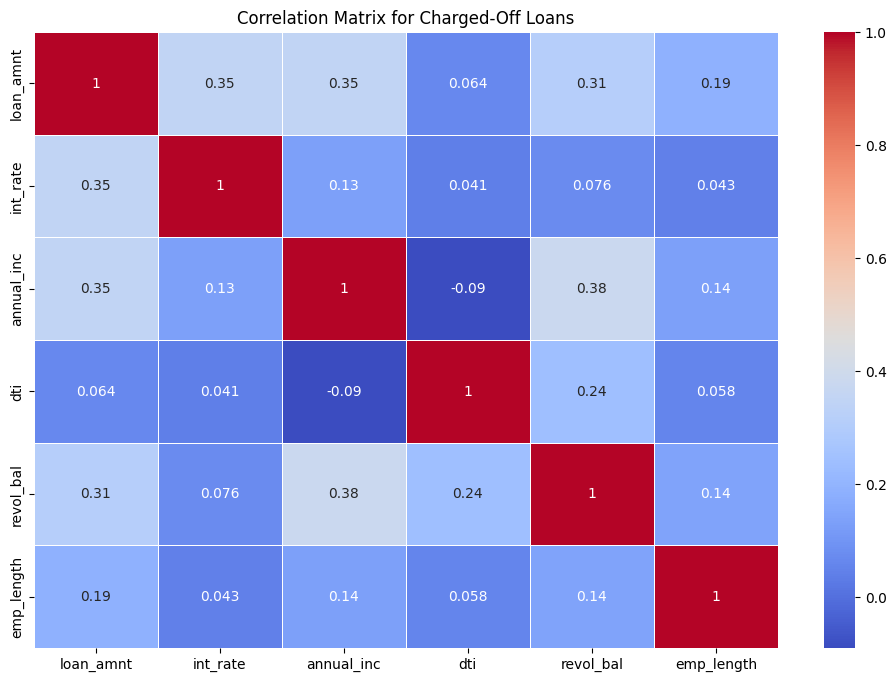

In [71]:
# A 0.38 correlation indicates that as annual income increases, the revolving balance (the amount owed on revolving credit accounts, such as credit cards) also tends to increase. 
# This relationship can signify that higher-income individuals might use more credit, either because they have higher spending power or because they might rely more heavily on credit to manage their cash flow.

emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length'] = df['emp_length'].replace(emp_length_mapping)

plt.figure(figsize=(12, 8))
corr = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'emp_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Charged-Off Loans')
plt.show()


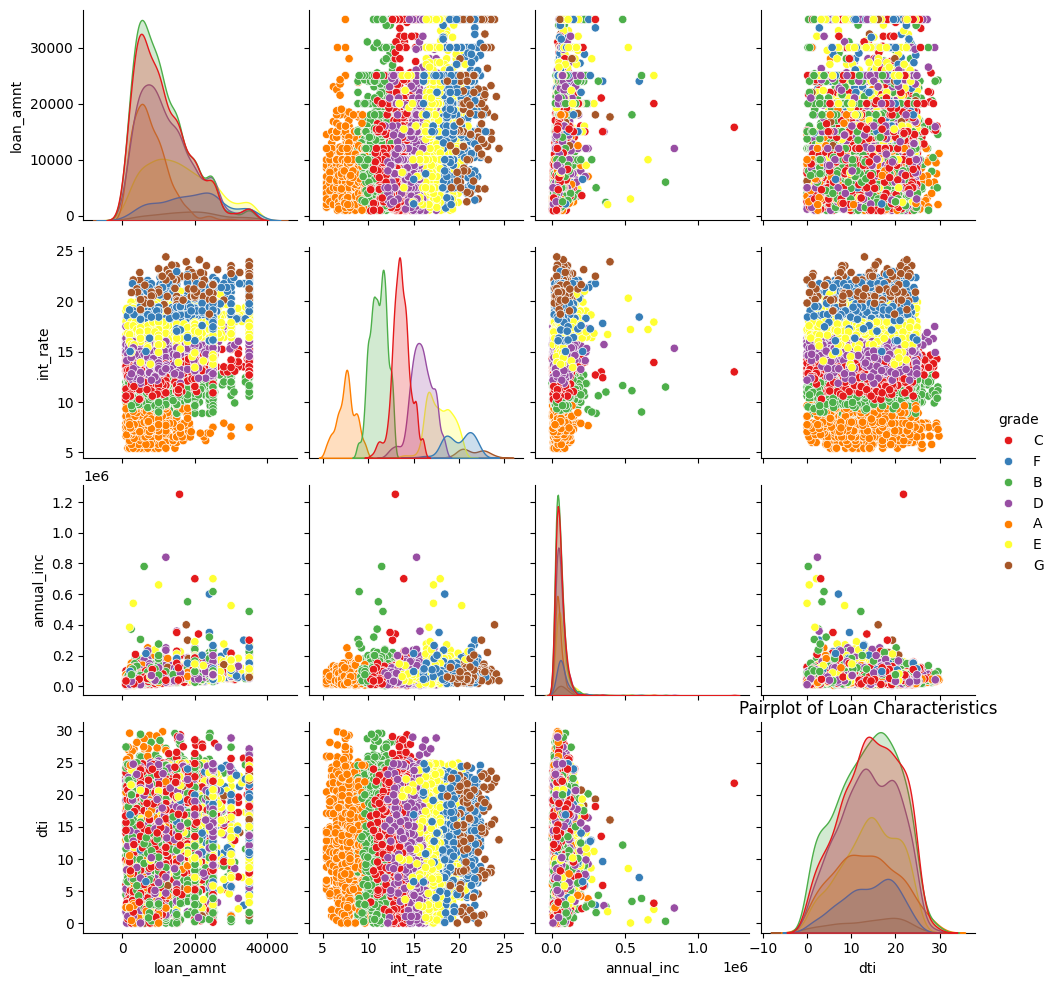

In [72]:
sns.pairplot(df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'grade']], hue='grade', palette='Set1')
plt.title('Pairplot of Loan Characteristics')
plt.show()


## Feature Engg


In [73]:
df['loan_to_income'] = df['loan_amnt'] / df['annual_inc']

/var/folders/j2/bmxf6y215_733h7zc3p0hpk80000gn/T/ipykernel_81426/4149034389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_to_income'] = df['loan_amnt'] / df['annual_inc']


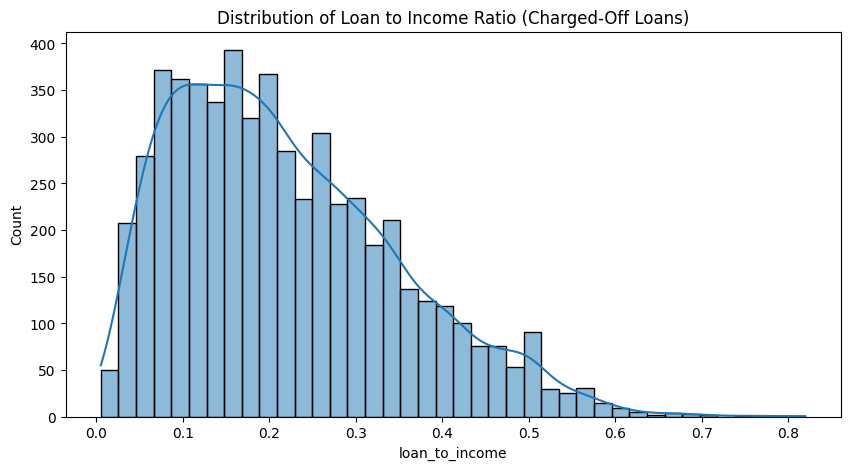

In [74]:
# Maximum number of defaults at a loan-to-income (LTI) ratio of 0.15
# An LTI ratio of 0.15 implies that borrowers are taking on loans that constitute 15% of their income. 
# Borrowers at this ratio are at a critical affordability threshold where loans become challenging to manage.
# Borrowers may be over-leveraging themselves relative to their income.
plt.figure(figsize=(10, 5))
sns.histplot(df['loan_to_income'], kde=True)
plt.title('Distribution of Loan to Income Ratio (Charged-Off Loans)')
plt.show()

